<h1>Introduction to ANOVA and Regression</h1>

Import Packages

In [27]:
import pandas as pd
import statsmodels as sm
from plotnine import *
import scipy as sp
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.oneway import anova_oneway
import statsmodels.stats.multicomp as mc
import scikit_posthocs as scp
from statsmodels.stats.multitest import multipletests




Import AMES Dataset

In [21]:
ames_py = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/Ames.csv")
ames_py.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,3,2010,WD,Normal,189900,-93.638933,42.060899


Honest Model Assessment

In [5]:
#Splitting the Data into Test/Train Sets
train,test = train_test_split(ames_py,test_size=0.3,random_state=123)
print(train.shape)

(2051, 81)


Bivariate Exploratory Data Analysis

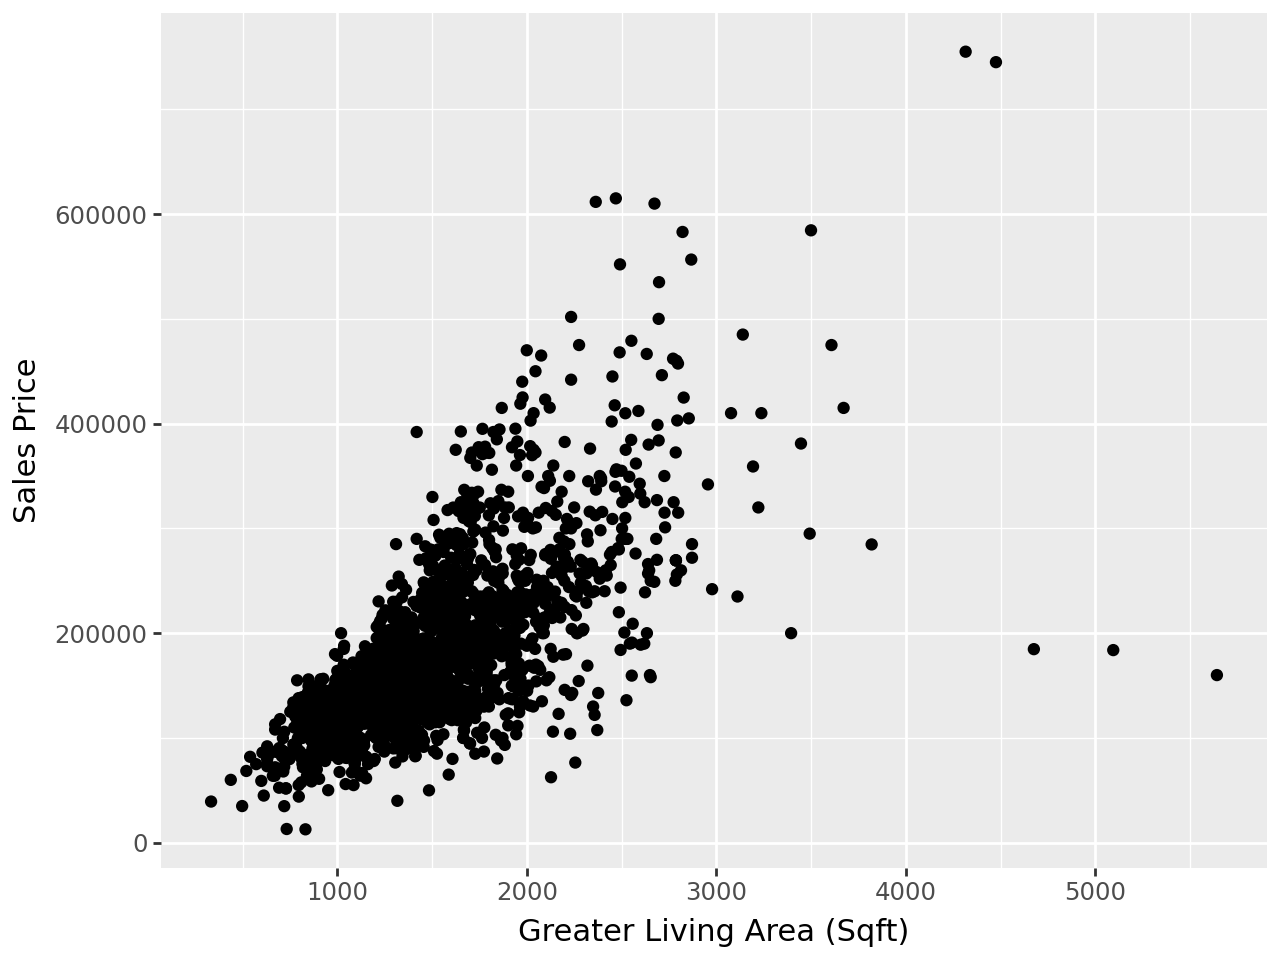

In [6]:
#Scatterplot

p = (ggplot(train, aes(x =
'Gr_Liv_Area', y = 'Sale_Price')) +
geom_point() + labs(y = "Sales Price", x =
"Greater Living Area (Sqft)"))

p.show()

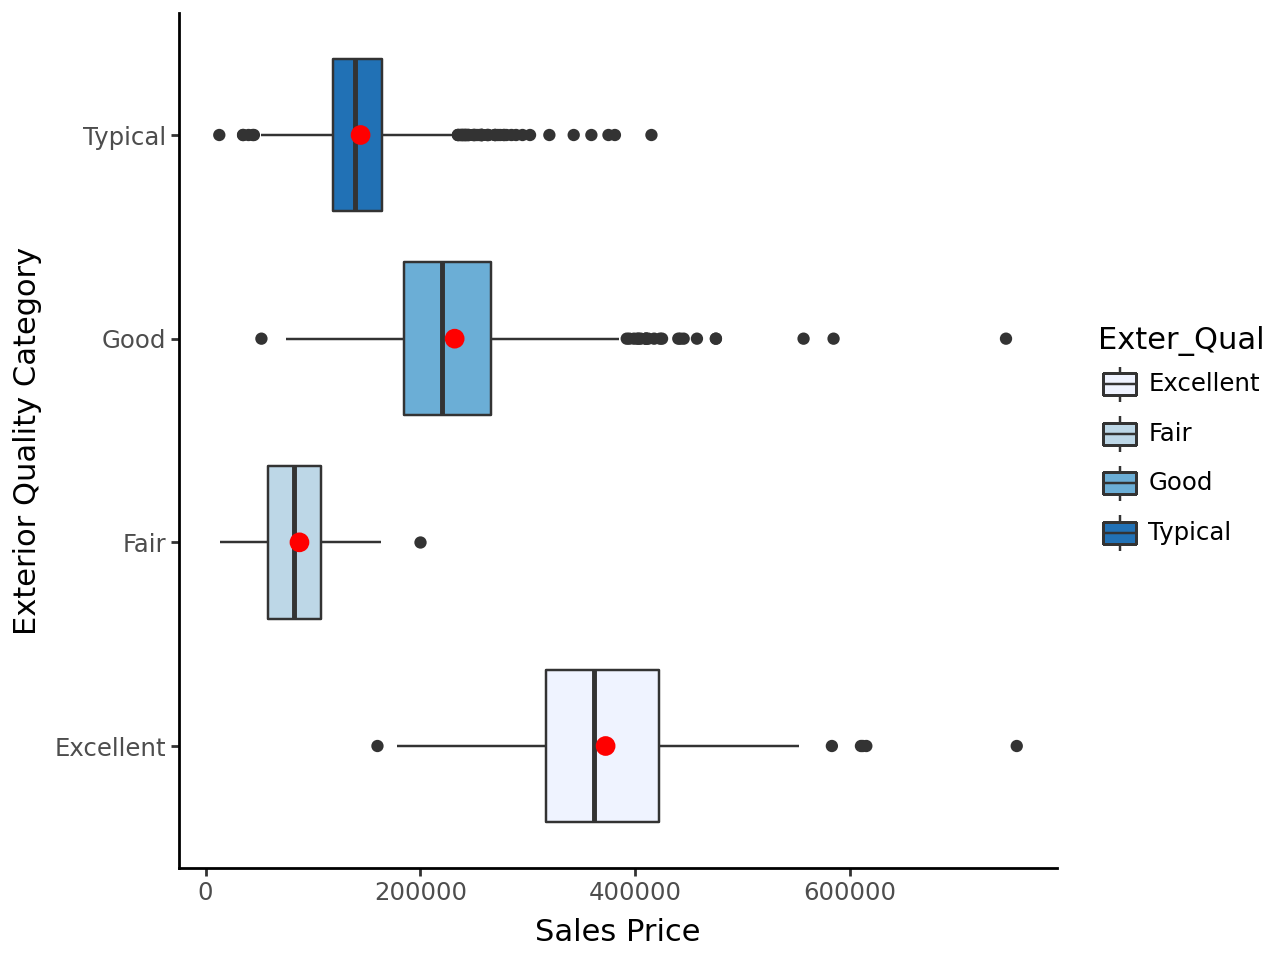

In [7]:
#Grouped Box-Plot

p = (
ggplot(train, aes(y = "Sale_Price", x = "Exter_Qual", fill =
"Exter_Qual")) +
geom_boxplot() +
labs(y = "Sales Price",
x = "Exterior Quality Category") +
stat_summary(fun_y=np.mean, geom = "point",
shape="o", size = 3, color = "red", fill = "red") +
scale_fill_brewer(palette="Blues") + theme_classic() +
coord_flip()
)

p.show()

c:\Users\irvin\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 55'. Pick better value with 'binwidth'.


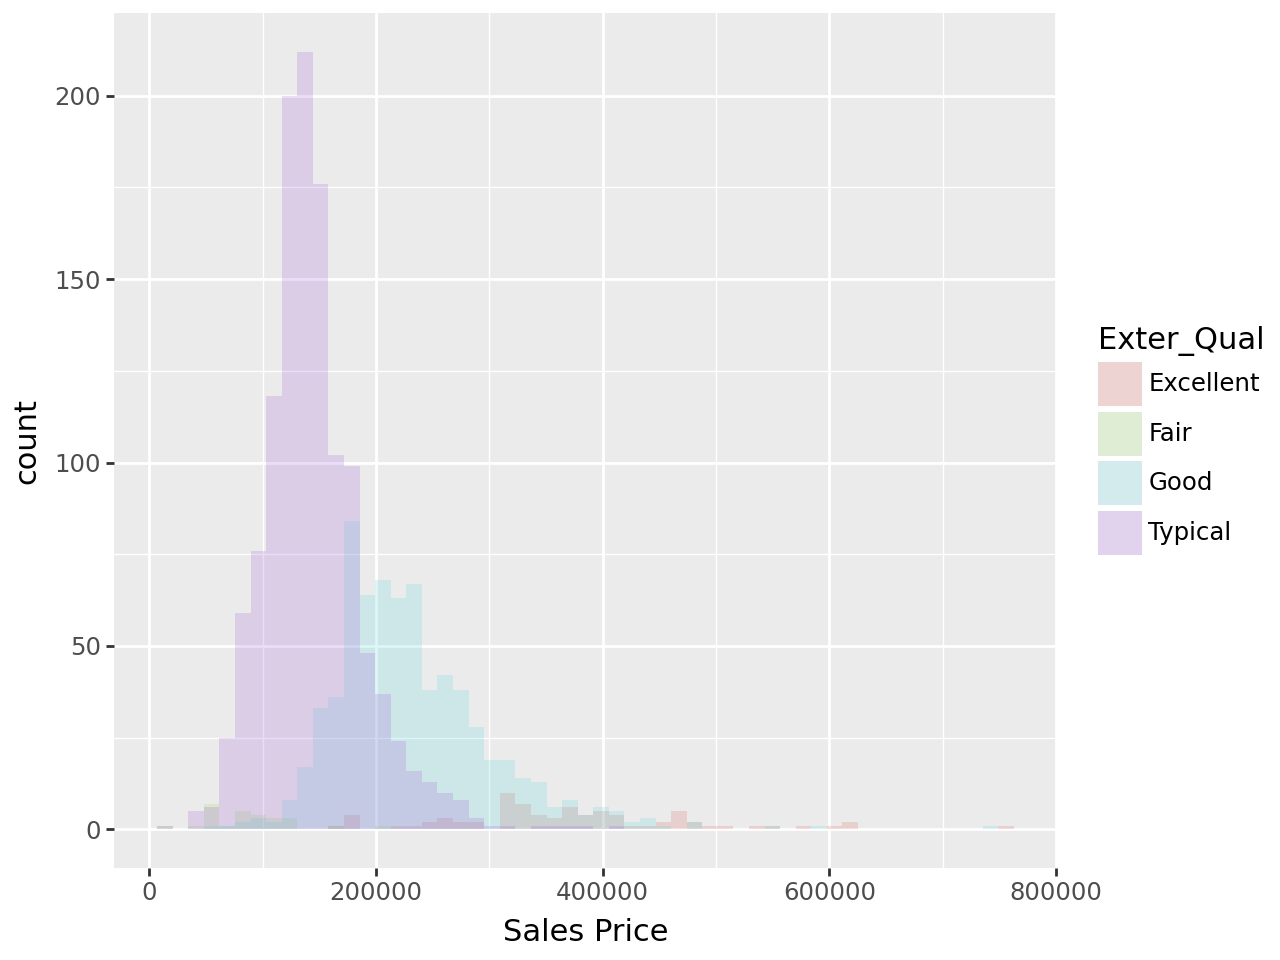

In [8]:
#Overlaid Histogram

p = (
ggplot(train,aes(x="Sale_Price", fill="Exter_Qual")) +
geom_histogram(alpha=0.2, position="identity") +
labs(x = "Sales Price")
)

p.show()

One Way ANOVA

In [9]:
#Create Model

cars2 = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/cars2.csv")
cars2.head()

model = smf.ols("MPG ~ C(Country)", data = cars2).fit()

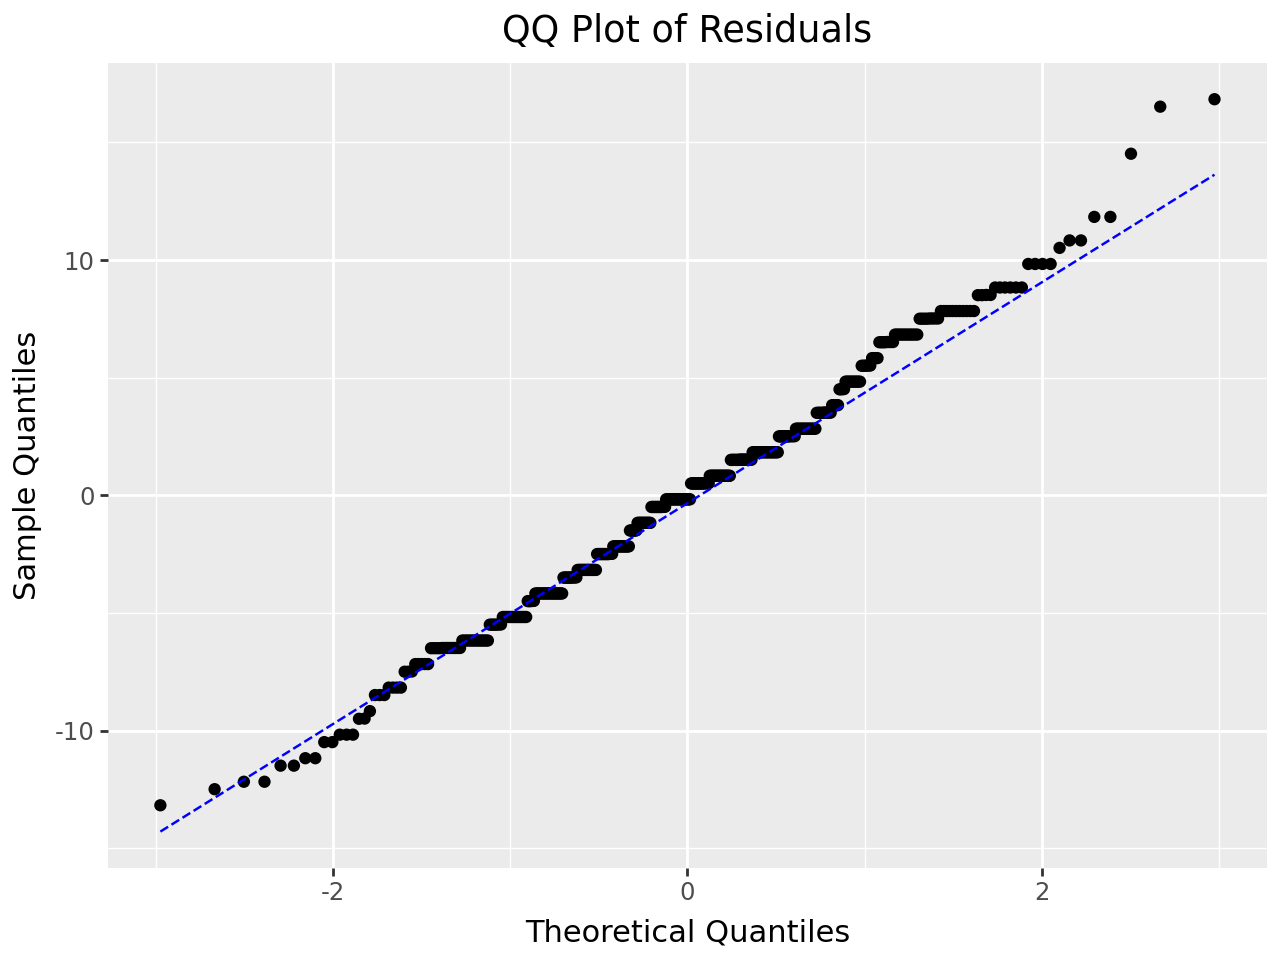

In [10]:
#Test Assumption of Normality Using Residual QQPlot

cars2["resid"]=model.resid
p = (
ggplot(cars2, aes(sample="resid")) +
geom_qq() +
geom_qq_line(color="blue", linetype="dashed") +
labs(title="QQ Plot of Residuals",
x="Theoretical Quantiles",
y="Sample Quantiles"))

p.show()

In [11]:
#Formal Tests For Normality

shap_test = sp.stats.shapiro(model.resid)
print(f"P-value is: {shap_test.pvalue:4f}")


P-value is: 0.051239


p-value: 0.002150


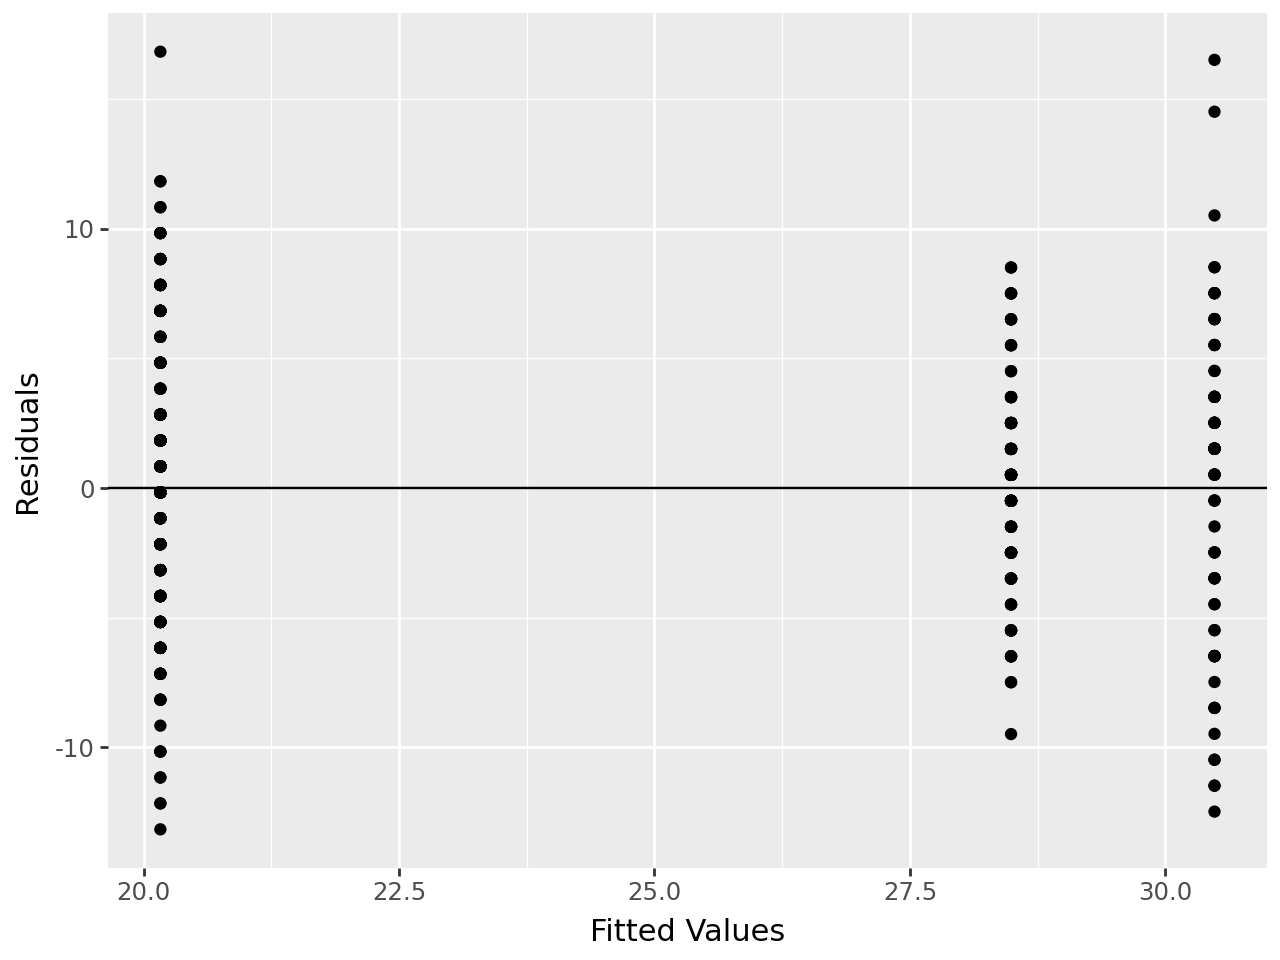

In [12]:
#Assumption of Equal Variances

US = cars2[cars2['Country']=='US']['MPG']
Japan = cars2[cars2['Country']=='Japanese']['MPG']
Germany = cars2[cars2['Country']=='Germany']['MPG']
l_test=sp.stats.levene(US, Japan, Germany)
print(f"p-value: {l_test.pvalue:4f}")

cars2['resid']=model.resid
cars2['predicted']=model.fittedvalues
p=(ggplot(cars2, aes(x='predicted',y='resid')) +
geom_point() + geom_hline(yintercept = 0) +
labs(x="Fitted Values", y="Residuals") )
p.show()


In [13]:
#Basic ANOVA

model = smf.ols("MPG ~ C(Country)", data =
cars2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
f_stat = anova_table.loc['C(Country)', 'F']
p_val = anova_table.loc['C(Country)',
'PR(>F)']
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4g}")


F-statistic: 172.1621
P-value: 1.716e-55


In [14]:
#Welch's ANOVA

model = anova_oneway(data = cars2['MPG'], groups = cars2['Country'], welch_correction = True)
print(f"The F-statistic is: {model.statistic:.4f}")
print(f"The p-value is: {model.pvalue:.4f}")

The F-statistic is: 174.9733
The p-value is: 0.0000


Basic Linear Regression

In [15]:
model = smf.ols("MPG ~ C(Country)", data = cars2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     172.2
Date:                Sat, 28 Jun 2025   Prob (F-statistic):           1.72e-55
Time:                        23:53:48   Log-Likelihood:                -1304.1
No. Observations:                 428   AIC:                             2614.
Df Residuals:                     425   BIC:                             2626.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 28.4900      0.511     55.735      0.000      27.485      29.495
C(Country)[T.Japanese]     1.9910      0.769      2.588      0.010       0.479       3.503
C(Country)[T.US]          -8.3253      0.605    -13.757      0.000      -9.515      -7.136
==============================================================================
Omnibus:                        1.367   Durbin-Watson:                   0.598
Prob(Omnibus):                  0.505   Jarque-Bera (JB):                1.281
Skew:                           0.134   Prob(JB):                        0.527
Kurtosis:                       3.017   Cond. No.                         4.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
f_stat = model.fvalue
pvalue = model.f_pvalue
print(f"Overall F-statistic: {f_stat:.4f}")
print(f"P-value: {pvalue: .4f}")

Overall F-statistic: 172.1621
P-value:  0.0000


Nonparametric ANOVA Tests

In [17]:
#Kruskal-Wallis Test

sp.stats.kruskal(US, Germany, Japan)

KruskalResult(statistic=197.7402772312319, pvalue=1.1514481178599443e-43)

ANOVA Post-Hoc Tests

In [23]:
#Tukey's Honest Significant Difference

comp = mc.MultiComparison(cars2['MPG'],
cars2['Country'])
ph_res = comp.tukeyhsd(alpha = 0.05)
ph_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Germany,Japanese,1.991,0.027,0.1813,3.8007,True
Germany,US,-8.3253,0.0,-9.7487,-6.902,True
Japanese,US,-10.3164,0.0,-11.8688,-8.7639,True


In [26]:
#Dunn's Test

result = scp.posthoc_dunn(cars2, val_col='MPG', group_col='Country', p_adjust='Bonferroni')
print(result)

               Germany      Japanese            US
Germany   1.000000e+00  7.536132e-01  1.851171e-27
Japanese  7.536132e-01  1.000000e+00  1.524401e-29
US        1.851171e-27  1.524401e-29  1.000000e+00


In [31]:
#False Discovery  Rate

pvals = [0.001, 0.03, 0.2, 0.4]

rejected, pvals_corrected, _, _ = multipletests(pvals, method='fdr_bh')
print("Adjusted B-H p-values:", pvals_corrected)
rejected, pvals_corrected, _, _ = multipletests(pvals,
method='bonferroni')
print("Adjusted Bonferroni p-values:", pvals_corrected)


Adjusted B-H p-values: [0.004      0.06       0.26666667 0.4       ]
Adjusted Bonferroni p-values: [0.004 0.12  0.8   1.   ]


In [30]:
#Bootstrap With Bonferroni Correction

def boot(x1, x2, direction, alpha):
    x1 = np.array(x1)
    x2 = np.array(x2)

    # Bootstrap resampling
    x1_boot = np.random.choice(x1, size=(10000, len(x1)), replace=True)
    x2_boot = np.random.choice(x2, size=(10000, len(x2)), replace=True)

    # Compute bootstrapped differences in medians
    test_boot = np.median(x1_boot, axis=1) - np.median(x2_boot, axis=1)

    # Compute p-value and decision
    if direction == "greater":
        p_value = np.mean(test_boot <= 0)
        result = "significant" if p_value < alpha else "not significant"
    elif direction == "less":
        p_value = np.mean(test_boot >= 0)
        result = "significant" if p_value < alpha else "not significant"
    elif direction == "ne":
        p_value = 2 * min(np.mean(test_boot <= 0), np.mean(test_boot >= 0))
        result = "significant" if p_value < alpha else "not significant"
    else:
        raise ValueError("direction must be 'greater', 'less', or 'ne'")

    return result, p_value

US = cars2['MPG'][cars2['Country']=='US']
Japan = cars2['MPG'][cars2['Country']=='Japanese']
Germany = cars2['MPG'][cars2['Country']=='Germany']
result_J,pval_J = boot(US, Japan, 'ne', 0.05)
result_G,pval_G = boot(US, Germany, 'ne', 0.05)
2*pval_J
2*pval_G

0.0